In [1]:
import numpy as np 
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.sample(5)

,v1,v2
1304,ham,Your right! I'll make the appointment right now.
2949,ham,Where are you ? You said you would be here whe...
217,ham,Easy ah?sen got selected means its good..
3839,ham,HEY MATE! HOWS U HONEY?DID U AVE GOOD HOLIDAY?...
1719,ham,Then u better go sleep.. Dun disturb u liao.. ...


In [7]:
# rename columns name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [8]:
df.sample(5)

,target,text
5148,ham,K..then come wenever u lik to come and also te...
3561,ham,Still chance there. If you search hard you wil...
2895,spam,pdate_Now - Double mins and 1000 txts on Orang...
3012,spam,FREE UNLIMITED HARDCORE PORN direct 2 your mob...
1225,ham,"sir, you will receive the account no another 1..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
# checking missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# checking duplicate value
df.duplicated().sum()

403

In [18]:
# remove duplicate value
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## Exploratory Data Analysis

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

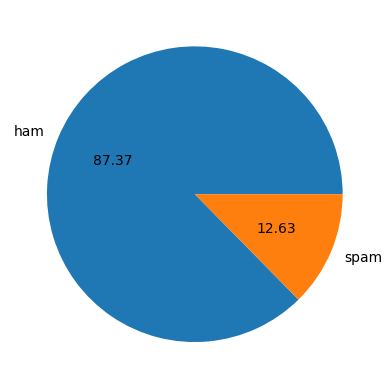

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [24]:
# !pip install nltk

In [25]:
import nltk
print(nltk.__version__)

3.8.1


In [26]:
# nltk.download('punkt')

In [27]:
df.loc[:, 'num_character'] = df['text'].apply(lambda x: len(str(x)))

C:\Users\bhave\AppData\Local\Temp\ipykernel_11748\3448468019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_character'] = df['text'].apply(lambda x: len(str(x)))


In [28]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [30]:
df.loc[:, 'num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\bhave\AppData\Local\Temp\ipykernel_11748\1109178887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [31]:
df.head()

,target,text,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df.loc[:, 'num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\bhave\AppData\Local\Temp\ipykernel_11748\3736788115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [33]:
df.head()

,target,text,num_character,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   target         5169 non-null   int64 
 1   text           5169 non-null   object
 2   num_character  5169 non-null   int64 
 3   num_word       5169 non-null   int64 
 4   num_sentences  5169 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.3+ KB


In [35]:
df.head()

,target,text,num_character,num_word,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_character','num_word','num_sentences']].describe()

,num_character,num_word,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
# ham
df[df['target'] == 0][['num_character','num_word','num_sentences']].describe()

,num_character,num_word,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [38]:
# spam
df[df['target'] == 1][['num_character','num_word','num_sentences']].describe()

,num_character,num_word,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [39]:
import seaborn as sn

<Axes: xlabel='num_character', ylabel='Count'>

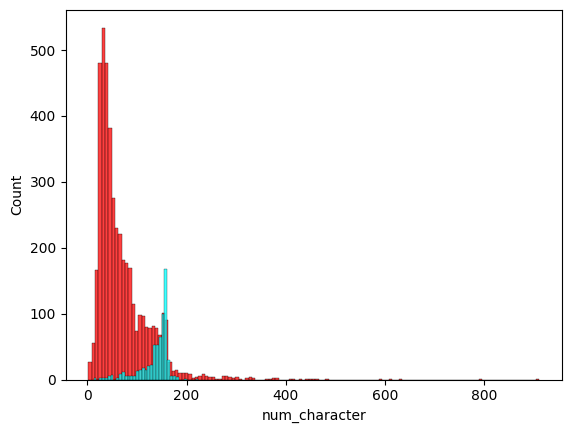

In [40]:
sn.histplot(df[df['target'] == 0]['num_character'],color='red')
sn.histplot(df[df['target'] == 1]['num_character'],color='cyan')

<Axes: xlabel='num_word', ylabel='Count'>

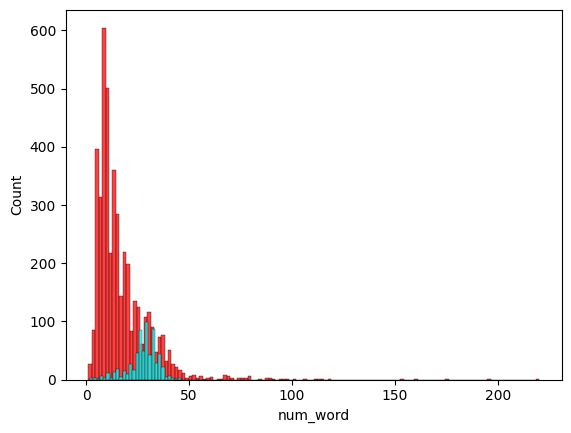

In [41]:
sn.histplot(df[df['target'] == 0]['num_word'],color='red')
sn.histplot(df[df['target'] == 1]['num_word'],color='cyan')

<Axes: xlabel='num_sentences', ylabel='Count'>

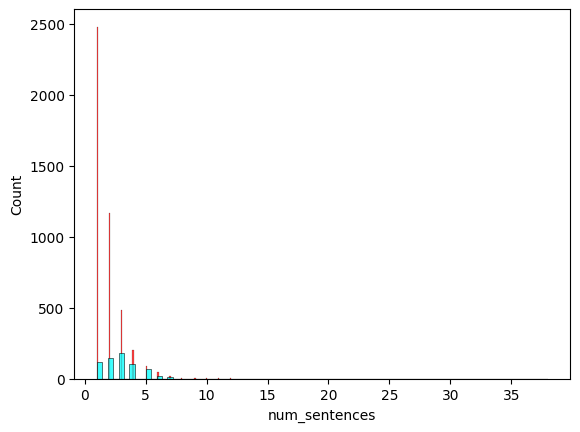

In [42]:
sn.histplot(df[df['target'] == 0]['num_sentences'],color='red')
sn.histplot(df[df['target'] == 1]['num_sentences'],color='cyan')

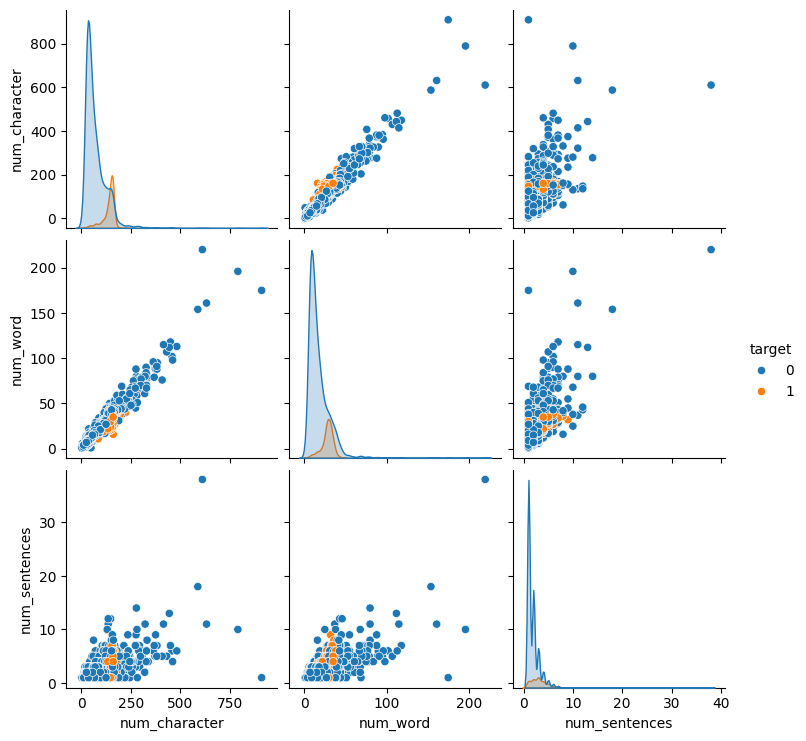

In [43]:
sn.pairplot(df,hue='target')

## Data Preprocessing

In [44]:
import string
from nltk.corpus import stopwords

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [45]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('going')

'go'

In [46]:
transform_text('Gamin industry is growing very fast, so do you agree')

'gamin industri grow fast agre'

In [47]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [50]:
df.loc[:,'transformed_text'] = df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_character,num_word,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
# pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [54]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

In [55]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=""))

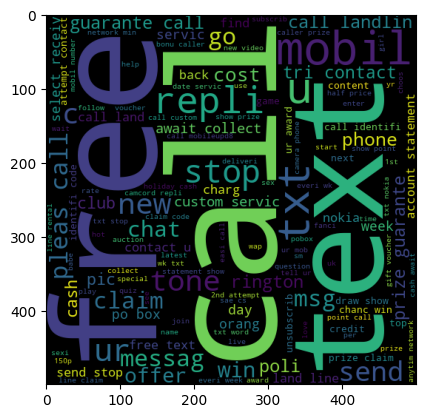

In [56]:
plt.imshow(spam_wc)

In [57]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=""))

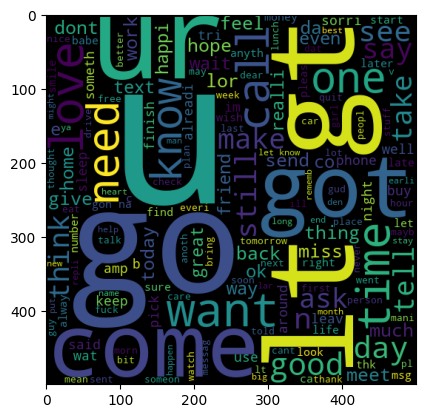

In [58]:
plt.imshow(ham_wc)

In [59]:
# for spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [60]:
len(spam_corpus)

9939

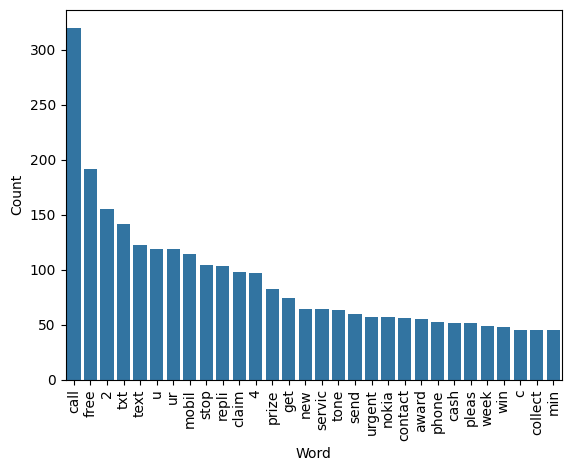

In [61]:
from collections import Counter
word_counts = Counter(spam_corpus)
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])
sn.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

In [62]:
# for ham
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [63]:
len(ham_corpus)

35404

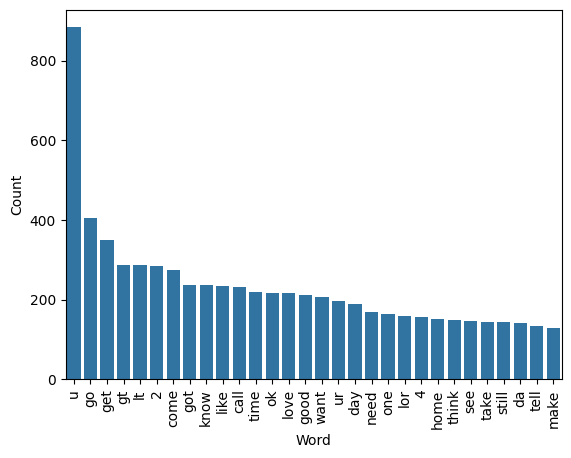

In [64]:
from collections import Counter
word_counts = Counter(ham_corpus)
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])
sn.barplot(x='Word', y='Count', data=word_counts_df)
plt.xticks(rotation='vertical')
plt.show()

## Model Building

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [66]:
# X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
X.shape

(5169, 3000)

In [68]:
y = df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [72]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [73]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [74]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred1))
print("con",confusion_matrix(y_test,y_pred1))
print("prec",precision_score(y_test,y_pred1))

Accuracy 0.8694390715667312
con [[788 108]
 [ 27 111]]
prec 0.5068493150684932


In [75]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred2))
print("con",confusion_matrix(y_test,y_pred2))
print("prec",precision_score(y_test,y_pred2))

Accuracy 0.9709864603481625
con [[896   0]
 [ 30 108]]
prec 1.0


In [76]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred3))
print("con",confusion_matrix(y_test,y_pred3))
print("prec",precision_score(y_test,y_pred3))

Accuracy 0.9835589941972921
con [[895   1]
 [ 16 122]]
prec 0.991869918699187


In [77]:
# # improve model
# tfidf = TfidfVectorizer(max_features=3000)

In [78]:
# X = tfidf.fit_transform(df['transformed_text']).toarray()

In [79]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [80]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [81]:
# from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
# from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
# gnb = GaussianNB()
# mnb = MultinomialNB()
# bnb = BernoulliNB()

In [82]:
# gnb.fit(X_train,y_train)
# y_pred1 = gnb.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred1))
# print("con",confusion_matrix(y_test,y_pred1))
# print("prec",precision_score(y_test,y_pred1))

In [83]:
# mnb.fit(X_train,y_train)
# y_pred2 = mnb.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred2))
# print("con",confusion_matrix(y_test,y_pred2))
# print("prec",precision_score(y_test,y_pred2))

In [84]:
# bnb.fit(X_train,y_train)
# y_pred3 = bnb.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred3))
# print("con",confusion_matrix(y_test,y_pred3))
# print("prec",precision_score(y_test,y_pred3))

In [85]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))